# Проект  Python

# Финансовый ассистент регулярных платежей с аналитикой использования

Telegram-бот для управления всеми регулярными платежами: подписки, коммунальные услуги, страховки, абонементы. Система отслеживает использование каждой услуги через удобные ручные отметки в боте, строит статистику частоты и автоматически рекомендует оптимизировать неиспользуемые более 3 недель сервисы. Планирую сделать визуализацию графиками распределения расходов по категориям, рассчитывать эффективность затрат на основе пользовательских оценок ("стоимость за единицу удовольствия и частоту использования"), прогнозы месячных/годовых платежей, что позволяет системно управлять личным бюджетом и сокращать необоснованные регулярные траты.


#### Обоснование проекта




Популяризация подписок - общемировой тренд, всё больше людей ими пользуются. С каждым днём растёт число интернет-пользователей, появляется больше удобных приложений: для просмотра фильмов, маркетплейсов, стриминговых платформ (например, YouTube Premium), банковских приложений (для Сбера, ВТБ, Т-банка и прочих), различных программных продуктов вроде сред разработки или специализированного софта для чертежей (nanocad), и множество других.

В итоге у человека накапливается всё больше ежемесячных платежей, за которыми сложно уследить и вовремя отключить. Многие забывают это делать и продолжают платить за неиспользуемые сервисы. Мой телеграм-бот платёжный ассистент будет как раз на это обращать внимание, показывать, сколько всего уходит денег в месяц, как часто человек реально пользуется каждой подпиской, и стоит ли она того, если используется всего 2–3 раза в месяц.

Также, c каждым годом из-за большого количества ежемесячных платежей в целом растёт финансовая нагрузка и стресс у людей.
Мой бот может использоваться как инструмент, который помогает этот стресс снизить через удобный и лёгкий контроль над ежемесячными расходами. Когда видишь, что у тебя всё учтено, нет лишних списаний и не нужно тревожиться о том, не забыл ли какой-нибудь платёж, то становится спокойнее. Потому мой продукт должен иметь некоторый спрос у людей, в частности, как у школьников и студентов, так и у взрослых.

Ниже приведена статистика.

#### Генерация данных


In [ ]:
# Найденная в интернете информация (оформил как таблицу)
import pandas as pd

subscription_stats = pd.DataFrame({
    'Сервис_подписка': [
        'СберПрайм',
        'Альфа-Смарт',
        'Газпром Бонус',
        'ВТБ Плюс',
        'Т-Банк Pro/Premium'
    ],
    'Количество_подписчиков': [
        'Несколько миллионов',
        'Более 1 млн',
        'Около 1 млн',
        'Около 400 тыс.',
        'Рост >30%'
    ],
    'Примечания': [
        'Источник: https://www.sberbank.ru/ru/press',
        'Подписку подключили за полгода с момента запуска. Источник: https://alfabank.ru/about/news',
        'Количество подписчиков в 2024 году выросло в 4,5 раза. Источник: https://www.gazprombank.ru/press',
        'Стали активными пользователями с момента запуска. Источник: https://www.vtb.ru/press',
        'Рост числа владельцев подписки за 2024 год. Источник: https://tbank.ru/news'
    ]
})

print("Данные о подписках в России:\n")
print(subscription_stats.to_string(index=False))

subscription_stats.to_csv('real_subscription_stats.csv', index=False, encoding='utf-8')

Данные о подписках в России:

   Сервис_подписка Количество_подписчиков                                                                                        Примечания
         СберПрайм    Несколько миллионов                                                        Источник: https://www.sberbank.ru/ru/press
       Альфа-Смарт            Более 1 млн        Подписку подключили за полгода с момента запуска. Источник: https://alfabank.ru/about/news
     Газпром Бонус            Около 1 млн Количество подписчиков в 2024 году выросло в 4,5 раза. Источник: https://www.gazprombank.ru/press
          ВТБ Плюс         Около 400 тыс.              Стали активными пользователями с момента запуска. Источник: https://www.vtb.ru/press
Т-Банк Pro/Premium              Рост >30%                       Рост числа владельцев подписки за 2024 год. Источник: https://tbank.ru/news


Промежуточные выводы:

У основных банковских подписок - миллионы пользователей,
рынок подписок продолжает активно расти (на примере Т-Банка +30% за год),
что говорит о том, что действительно с каждым годом люди начинают пользоваться подписками всё больше и больше.
Также, пользователи часто подключают несколько подписок одновременно,
многие продолжают платить за подписки, которыми мало пользуются

Сгенерированные данные

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

np.random.seed(42)
random.seed(42)

def generate_subscription_data(num_users=100):
    users_data = []

    categories = [
        'Стриминг видео', 'Стриминг музыки', 'Игры',
        'Образование', 'Софт/ПО', 'Фитнес', 'Доставка еды',
        'Облачные сервисы', 'Маркетплейсы', 'Такси/Транспорт',
        'Банковские услуги'
    ]

    services = {
        'Стриминг видео': ['Netflix', 'YouTube Premium', 'Иви', 'Okko', 'Start', 'More.tv'],
        'Стриминг музыки': ['Яндекс.Музыка', 'Spotify', 'VK Музыка', 'Apple Music', 'Zvooq'],
        'Игры': ['PlayStation Plus', 'Xbox Game Pass', 'Steam', 'Nintendo Switch Online'],
        'Образование': ['Coursera', 'Skillbox', 'Нетология', 'GeekBrains', 'Stepik'],
        'Софт/ПО': ['Adobe Creative Cloud', 'Microsoft 365', 'Notion', 'Figma', '1C'],
        'Фитнес': ['FitPrime', 'WeGym', 'Яндекс.Тренер PRO', 'JustFit'],
        'Доставка еды': ['Delivery Club Premium', 'Yandex.Eda+', 'СберМаркет Плюс'],
        'Облачные сервисы': ['Яндекс.Диск PRO', 'Google One', 'iCloud+', 'Dropbox'],
        'Маркетплейсы': ['WB Подписка', 'OZON Premium', 'AliExpress Plus'],
        'Такси/Транспорт': ['Яндекс.Плюс', 'Ситимобил Плюс', 'Uber Pass'],
        'Банковские услуги': ['СберПрайм', 'Альфа-Смарт', 'ВТБ Плюс', 'Т-Банк Pro', 'Газпром Бонус', 'Тинькофф Премиум']
    }

    subscription_counts = [1, 2, 3, 4, 5]
    weights = [0.30, 0.25, 0.20, 0.15, 0.10]

    for user_id in range(1, num_users + 1):
        num_subscriptions = random.choices(subscription_counts, weights=weights)[0]

        user_categories = []

        for _ in range(num_subscriptions):
            available_categories = [cat for cat in categories if cat not in user_categories]
            if not available_categories:
                available_categories = categories

            category = random.choice(available_categories)
            user_categories.append(category)
            service = random.choice(services[category])

            if category in ['Банковские услуги', 'Маркетплейсы', 'Такси/Транспорт', 'Фитнес']:
                price = random.choice([199, 299, 399])
            elif category == 'Софт/ПО':
                price = random.choice([500, 900, 1200, 1500])
            else:
                price = random.choice([199, 299, 399, 449, 599, 799, 999])

            months_ago = random.randint(1, 18)
            start_date = datetime.now() - timedelta(days=30 * months_ago)

            mean_usage_per_month = random.randint(1, 30)

            users_data.append({
                'user_id': user_id,
                'category': category,
                'service': service,
                'monthly_price': price,
                'subscription_start_date': start_date,
                'mean_usage_per_month': mean_usage_per_month
            })

    return pd.DataFrame(users_data)

def generate_payment_data(subscriptions_df):
    payments_data = []

    for _, sub in subscriptions_df.iterrows():
        start_date = pd.to_datetime(sub['subscription_start_date'])

        months_active = min(6, (datetime.now() - start_date).days // 30)

        for month in range(1, months_active + 1):
            payment_date = start_date + timedelta(days=30 * month)

            if payment_date > datetime.now():
                continue

            payments_data.append({
                'user_id': sub['user_id'],
                'service': sub['service'],
                'category': sub['category'],
                'amount': sub['monthly_price'],
                'payment_date': payment_date,
                'status': 'success'
            })

    return pd.DataFrame(payments_data)

subscriptions_df = generate_subscription_data(150)
payments_df = generate_payment_data(subscriptions_df)

subscriptions_df.to_csv('subscriptions_data.csv', index=False, encoding='utf-8')
payments_df.to_csv('payments_data.csv', index=False, encoding='utf-8')

subs_per_user = subscriptions_df.groupby('user_id').size()
distribution = subs_per_user.value_counts().sort_index()

print(f"Сгенерировано данных:")
print(f"- Подписки: {len(subscriptions_df)} записей")
print(f"- Платежей за подписки с начала подключения: {len(payments_df)} записей")
print(f"- Пользователей: {subscriptions_df['user_id'].nunique()}")
print(f"- Среднее количество подписок на пользователя: {len(subscriptions_df) / subscriptions_df['user_id'].nunique():.1f}")

print("\nПервые 10 записей о подписках:")
print(subscriptions_df.head(10))

Сгенерировано данных:
- Подписки: 350 записей
- Платежей за подписки с начала подключения: 1834 записей
- Пользователей: 150
- Среднее количество подписок на пользователя: 2.3

Первые 10 записей о подписках:
   user_id         category                service  monthly_price  \
0        1   Стриминг видео                More.tv            399   
1        1      Образование               Coursera            799   
2        1     Маркетплейсы            WB Подписка            199   
3        2  Такси/Транспорт            Яндекс.Плюс            399   
4        3     Маркетплейсы           OZON Premium            199   
5        3          Софт/ПО   Adobe Creative Cloud            900   
6        3           Фитнес                  WeGym            199   
7        4  Стриминг музыки              VK Музыка            999   
8        5   Стриминг видео                More.tv            449   
9        6     Доставка еды  Delivery Club Premium            599   

     subscription_start_date  me

#### Анализ данных

Основая статистика:
Всего пользователей: 150
Всего активных подписок: 350
Среднее количество подписок на пользователя: 2.3
Средняя стоимость подписки: 498 руб.
Средние ежемесячные расходы на пользователя: 1163 руб.

Анализ эффективности использования подписок:
Пользователей с редко используемыми подписками (<5 раз/мес): 45 из 150 (30.0%)
Всего редко используемых подписок: 50
Средняя экономия в месяц на пользователя при отмене неиспользуемых подписок: 595 руб.
Среднее количество редко используемых подписок на пользователя: 1.1


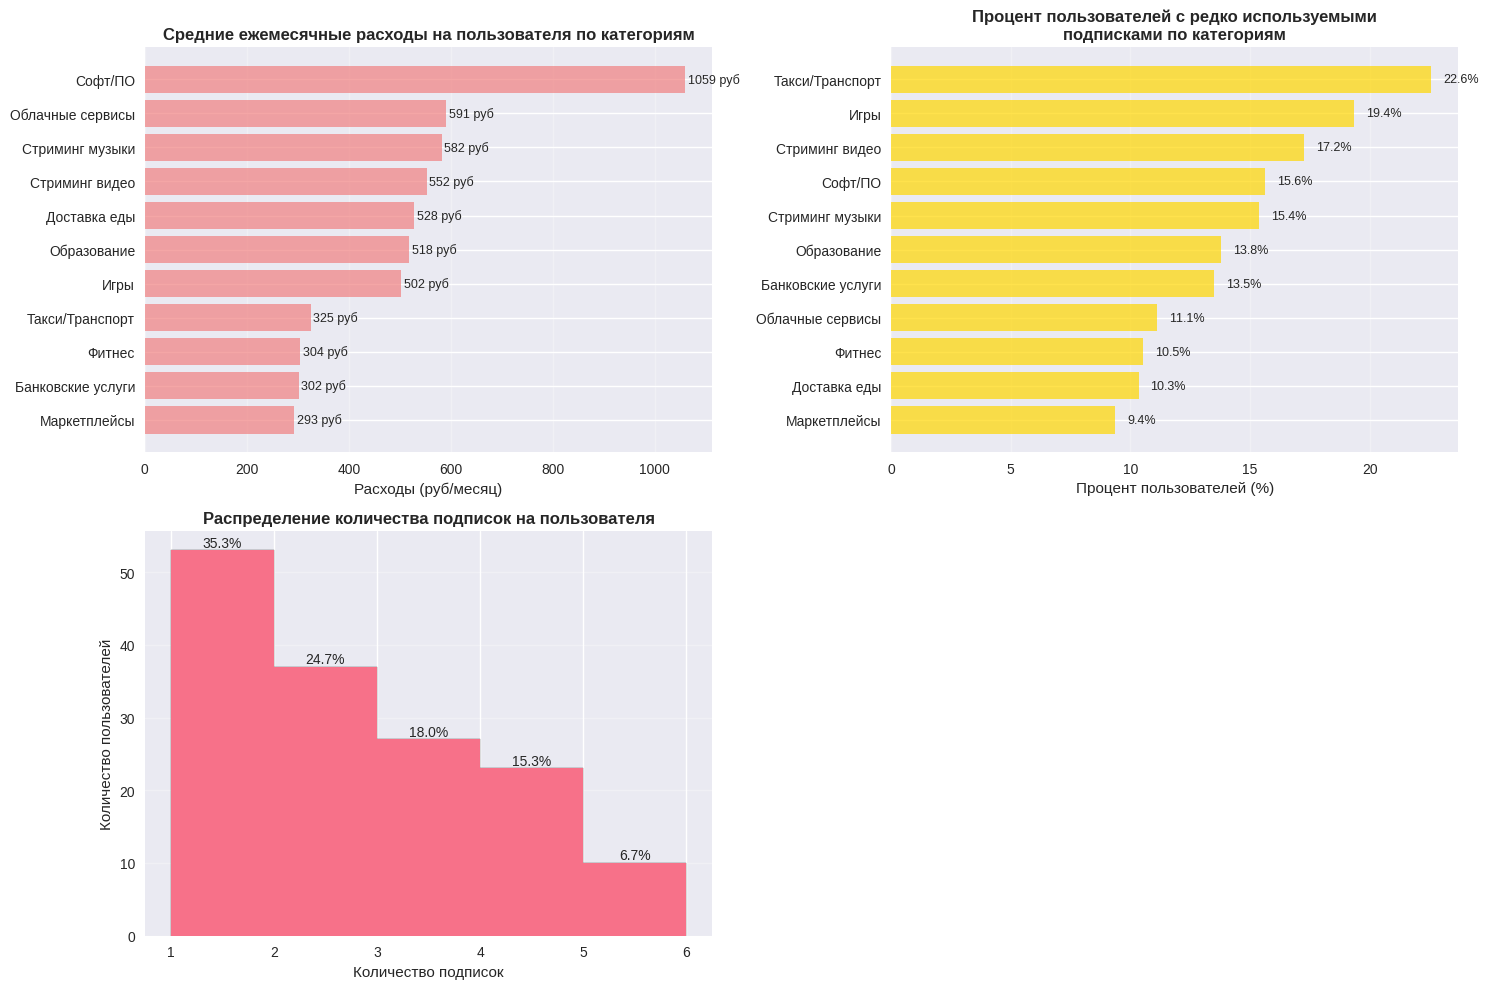

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

subscriptions_df = pd.read_csv('subscriptions_data.csv')

print("Основая статистика:")
print(f"Всего пользователей: {subscriptions_df['user_id'].nunique()}")
print(f"Всего активных подписок: {len(subscriptions_df)}")
print(f"Среднее количество подписок на пользователя: {len(subscriptions_df) / subscriptions_df['user_id'].nunique():.1f}")
print(f"Средняя стоимость подписки: {subscriptions_df['monthly_price'].mean():.0f} руб.")
print(f"Средние ежемесячные расходы на пользователя: {subscriptions_df.groupby('user_id')['monthly_price'].sum().mean():.0f} руб.")

subscriptions_df['rarely_used'] = subscriptions_df['mean_usage_per_month'] < 5
rarely_used_subs = subscriptions_df[subscriptions_df['rarely_used'] == True]

users_with_rare_subs = rarely_used_subs['user_id'].nunique()
total_users = subscriptions_df['user_id'].nunique()

print(f"\nАнализ эффективности использования подписок:")
print(f"Пользователей с редко используемыми подписками (<5 раз/мес): {users_with_rare_subs} из {total_users} ({users_with_rare_subs/total_users*100:.1f}%)")
print(f"Всего редко используемых подписок: {len(rarely_used_subs)}")
print(f"Средняя экономия в месяц на пользователя при отмене неиспользуемых подписок: {rarely_used_subs.groupby('user_id')['monthly_price'].sum().mean():.0f} руб.")
print(f"Среднее количество редко используемых подписок на пользователя: {len(rarely_used_subs) / users_with_rare_subs:.1f}")

plt.figure(figsize=(15, 10))

# Первый график, средние расходы на категорию для одного пользователя
plt.subplot(2, 2, 1)
user_category_spending = subscriptions_df.groupby(['user_id', 'category'])['monthly_price'].sum().reset_index()
avg_spending_per_category = user_category_spending.groupby('category')['monthly_price'].mean().sort_values(ascending=True)

plt.barh(avg_spending_per_category.index, avg_spending_per_category.values, color='lightcoral', alpha=0.7)
plt.title('Средние ежемесячные расходы на пользователя по категориям', fontsize=12, fontweight='bold')
plt.xlabel('Расходы (руб/месяц)')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(avg_spending_per_category.values):
    plt.text(v + 5, i, f'{v:.0f} руб', va='center', fontsize=9)

# Второй график, процент пользователей с редко используемыми подписками по категориям
plt.subplot(2, 2, 2)
category_rare_users = []
for category in subscriptions_df['category'].unique():
    users_in_category = subscriptions_df[subscriptions_df['category'] == category]['user_id'].unique()
    rare_users_in_category = rarely_used_subs[rarely_used_subs['category'] == category]['user_id'].unique()
    percentage = len(rare_users_in_category) / len(users_in_category) * 100
    category_rare_users.append((category, percentage))

category_rare_users_df = pd.DataFrame(category_rare_users, columns=['category', 'percentage'])
category_rare_users_df = category_rare_users_df.sort_values('percentage', ascending=True)

plt.barh(category_rare_users_df['category'], category_rare_users_df['percentage'], color='gold', alpha=0.7)
plt.title('Процент пользователей с редко используемыми\nподписками по категориям', fontsize=12, fontweight='bold')
plt.xlabel('Процент пользователей (%)')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(category_rare_users_df['percentage']):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)

# Третий график, распределение количества подписок на пользователя
plt.subplot(2, 2, 3)
subs_per_user = subscriptions_df.groupby('user_id').size()

plt.hist(subs_per_user, bins=range(1, 7), color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Распределение количества подписок на пользователя', fontsize=12, fontweight='bold')
plt.xlabel('Количество подписок')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.3)

counts, bins, patches = plt.hist(subs_per_user, bins=range(1, 7))
total = len(subs_per_user)
for i, count in enumerate(counts):
    if count > 0:
        plt.text(bins[i] + 0.5, count + 0.5, f'{count/total*100:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Выводы

После анализа данных можно сказать, что проблема управления подписками действительно актуальна. В среднем у каждого пользователя по 2-3 подписки, на которые ежемесячно уходит в среднем 1200 рублей.

При этом треть пользователей (30%) имеют подписки, которыми практически не пользуются - менее 5 раз в месяц. В среднем на каждого такого пользователя приходится по одной неиспользуемой подписке, и их отмена позволила бы сэкономить в среднем около 600 рублей в месяц.

Это подтверждает, что финансовый ассистент для управления регулярными платежами действительно нужен, так как он поможет пользователям отслеживать неиспользуемые подписки и экономить, а также больше не тратить своё время и внимание на их контроль
